In [16]:
%load_ext autoreload
%autoreload 2

import os

import pandas as pd

import calliope
calliope.set_log_verbosity()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
m = calliope.examples.urban_scale(scenario='eurocalliope_chp_simple,mapbox')

[2020-10-21 14:59:31] INFO     Model: initialising
[2020-10-21 14:59:31] INFO     Loading overrides from scenario: eurocalliope_chp_simple 
[2020-10-21 14:59:31] INFO     Loading overrides from scenario: mapbox 
[2020-10-21 14:59:31] INFO     Applying the following overrides from scenario definition: {'eurocalliope_base', 'mapbox_ready', 'chp_extraction_simple'} 
[2020-10-21 14:59:31] INFO     `links.N1,X2.techs.heat_pipes.distance`:3 applied from override as new configuration
`links.N1,X3.techs.heat_pipes.distance`:4 applied from override as new configuration
`links.X1,N1.techs.heat_pipes.distance`:3 applied from override as new configuration
Override applied to links.X1,X2.techs.power_lines.distance: 10 -> 10
`links.X1,X3.techs.power_lines.distance`:5 applied from override as new configuration
`locations.N1.coordinates.lat`:51.4450766 applied from override as new configuration
`locations.N1.coordinates.lon`:-0.1247183 applied from override as new configuration
`locations.X1.coordinat

In [15]:
m._model_run.applied_overrides

'eurocalliope_base;mapbox_ready;chp_extraction_simple'

In [88]:
m.run()

<AxesSubplot:xlabel='X1::chp::heat', ylabel='X1::chp::electricity'>

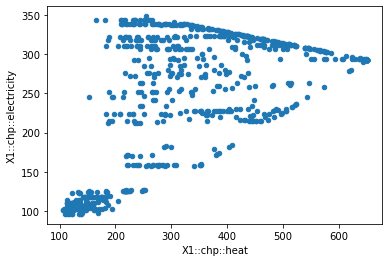

In [89]:
m.results.carrier_prod.loc[['X1::chp::heat', 'X1::chp::electricity']].to_series().unstack('loc_tech_carriers_prod').plot.scatter(x='X1::chp::heat', y='X1::chp::electricity')

<AxesSubplot:xlabel='timesteps'>

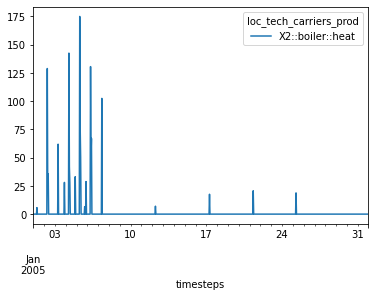

In [91]:
m.results.carrier_prod.loc[['X2::boiler::heat']].to_series().unstack('loc_tech_carriers_prod').plot()

In [90]:
m.results.energy_cap.loc[['X1::chp']]

<xarray.DataArray 'energy_cap' (loc_techs: 1)>
array([384.0505])
Coordinates:
  * loc_techs  (loc_techs) object 'X1::chp'
Attributes:
    is_result:  1

In [92]:
import xarray as xr

In [96]:
latitude = 30
1.3793 + latitude * (1.2011 + latitude * (-0.014404 + latitude * 0.000080509))

26.622443000000004